# SmartBeds - Técnicas de reducción de dimensionalidad

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [1]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk
import gc #Garbage colector

## Lectura de datos

In [2]:
with open('datos.pdd','rb') as f:
    datos = pk.load(f)
    
datos_seizure = datos.loc[datos['target']==True]
datos_notSeizure = datos.loc[datos['target']==False]

In [22]:
with open('datosE.pdd','rb') as f:
    dataE = pk.load(f)

dataE_seizure = dataE.loc[dataE['target']==True]
dataE_notSeizure = dataE.loc[dataE['target']==False]

## Componentes principales (PCA)

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

### Datos Brutos

In [12]:
data = datos.iloc[:,1:13]
pcaB = PCA(n_components=2).fit_transform(data)

Text(0.5, 1.0, 'PCA Raw')

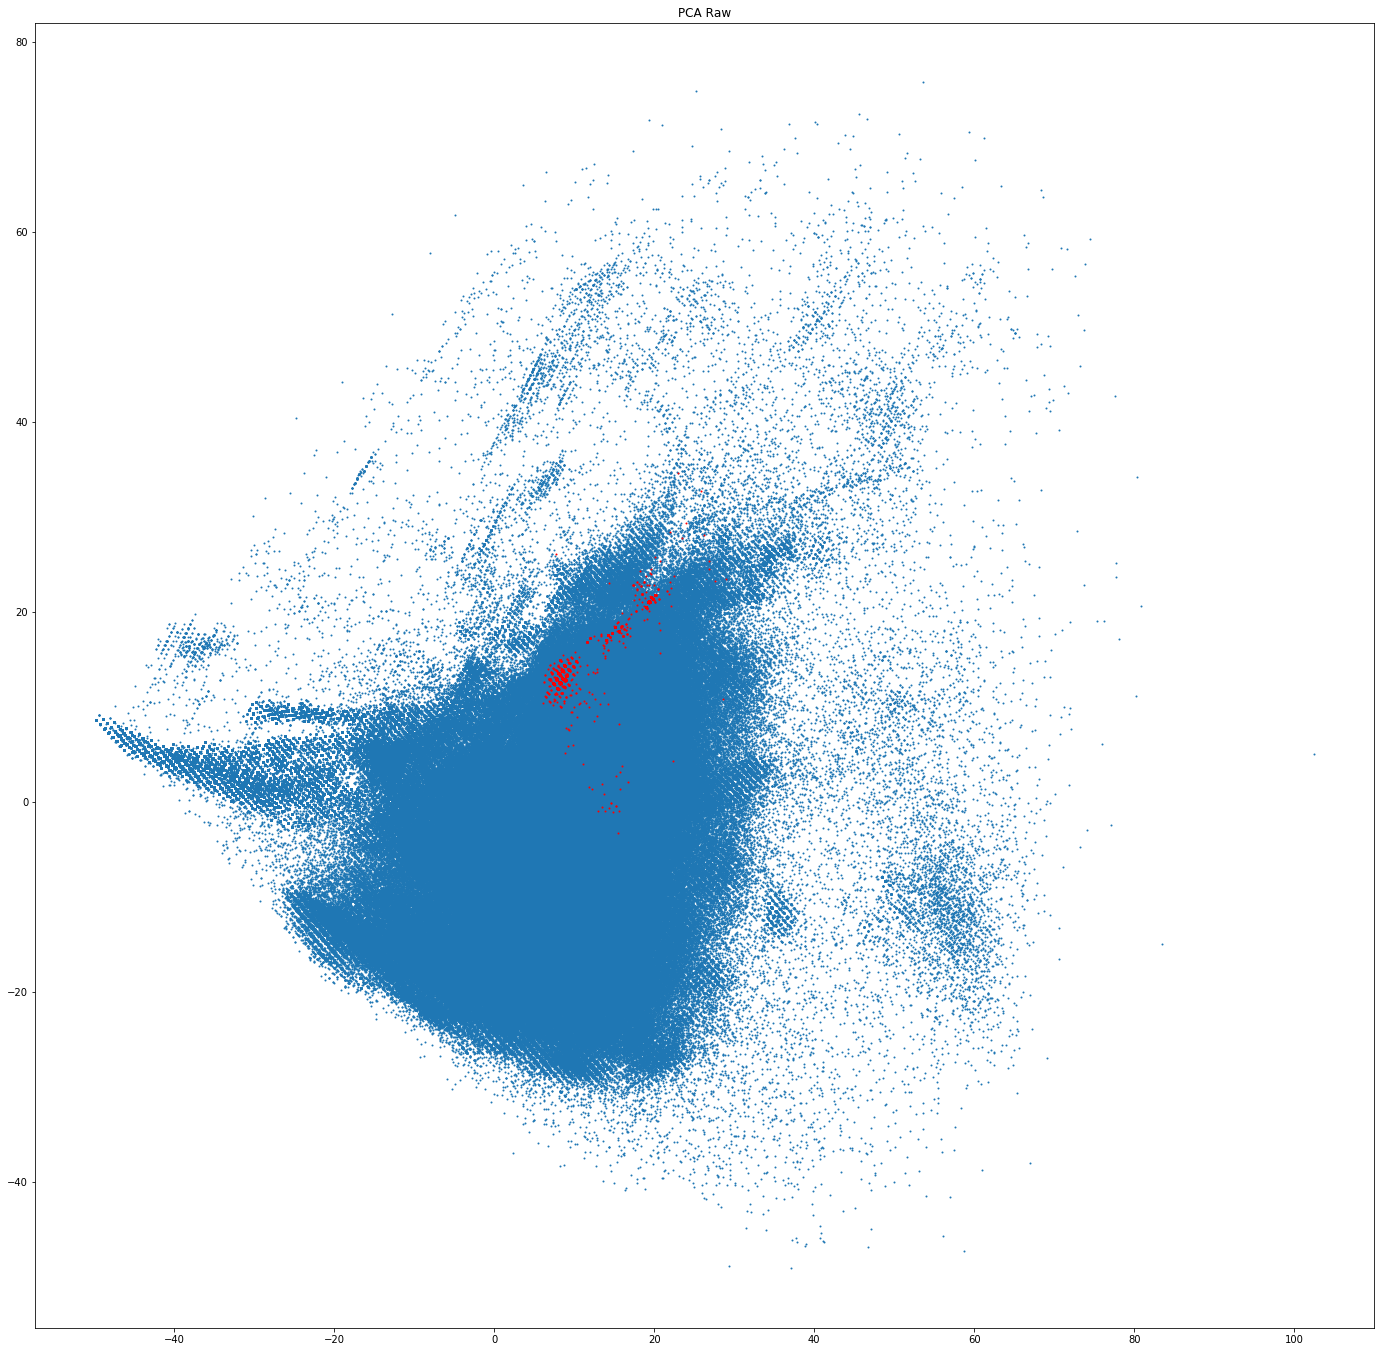

In [13]:
plt.figure(figsize=(24,24))
pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('PCA Raw')


### Estadísticas móviles

In [26]:
datosE = dataE
datosE = datosE.iloc[:,14:]
medias = datosE.iloc[:,0:12]
desv = datosE.iloc[:,12:]

datosEs = MinMaxScaler().fit_transform(datosE)
datosE.head()

,P1 mean,P2 mean,P3 mean,P4 mean,P5 mean,P6 mean,P7 mean,P8 mean,P9 mean,P10 mean,...,P3 std,P4 std,P5 std,P6 std,P7 std,P8 std,P9 std,P10 std,P11 std,P12 std
24,1.04,29.76,41.64,26.96,8.00,1.56,1.04,0.0,0.0,0.04,...,4.338587,3.973663,0.866025,0.711805,0.2,0.0,0.0,0.2,0.2,0.0
25,1.04,29.40,40.92,26.36,7.96,1.64,1.04,0.0,0.0,0.04,...,2.691344,2.447448,0.789515,0.637704,0.2,0.0,0.0,0.2,0.2,0.0
26,1.04,29.32,40.84,26.36,8.00,1.68,1.04,0.0,0.0,0.04,...,2.656439,2.447448,0.763763,0.627163,0.2,0.0,0.0,0.2,0.2,0.0
27,1.04,29.32,40.76,26.36,8.04,1.76,1.04,0.0,0.0,0.04,...,2.681418,2.447448,0.734847,0.663325,0.2,0.0,0.0,0.2,0.2,0.0
28,1.04,29.28,40.68,26.40,8.12,1.80,1.04,0.0,0.0,0.04,...,2.672702,2.449490,0.725718,0.645497,0.2,0.0,0.0,0.2,0.2,0.0


In [14]:
pcaM = PCA(n_components=2).fit_transform(medias)
pcaD = PCA(n_components=2).fit_transform(desv)
pcaMD = PCA(n_components=2).fit_transform(datosEs)

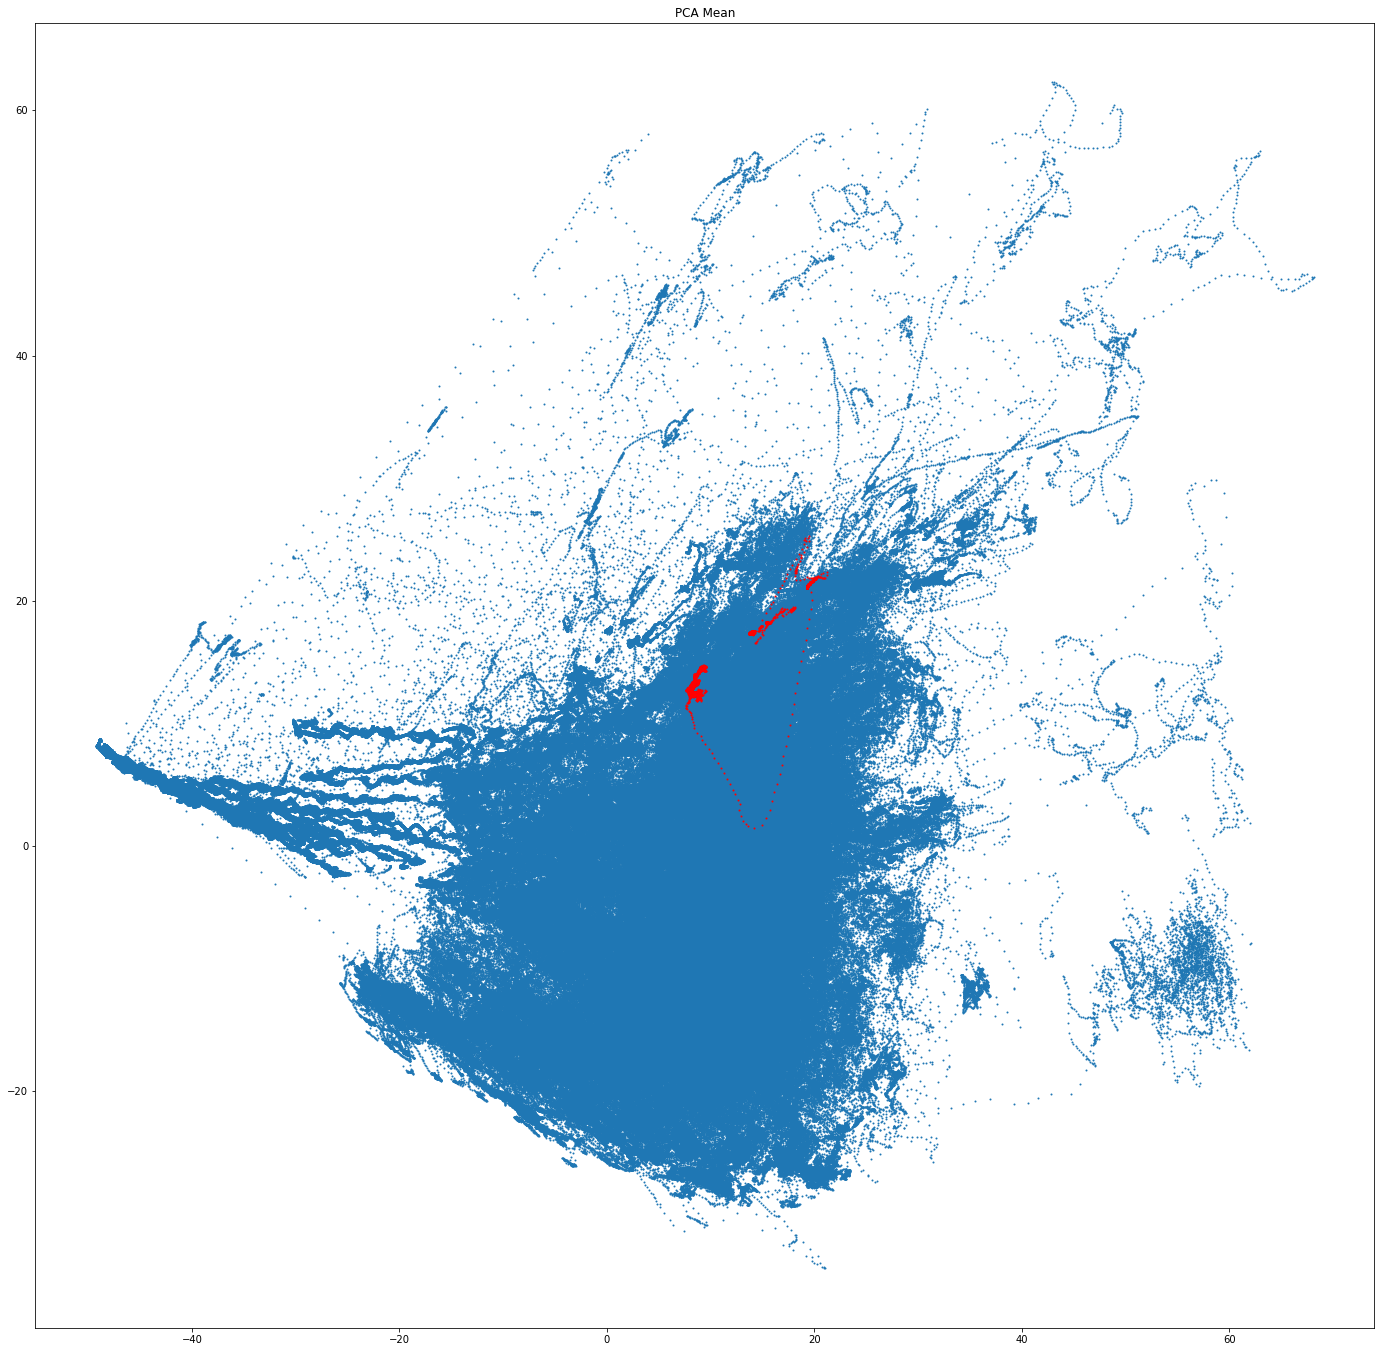

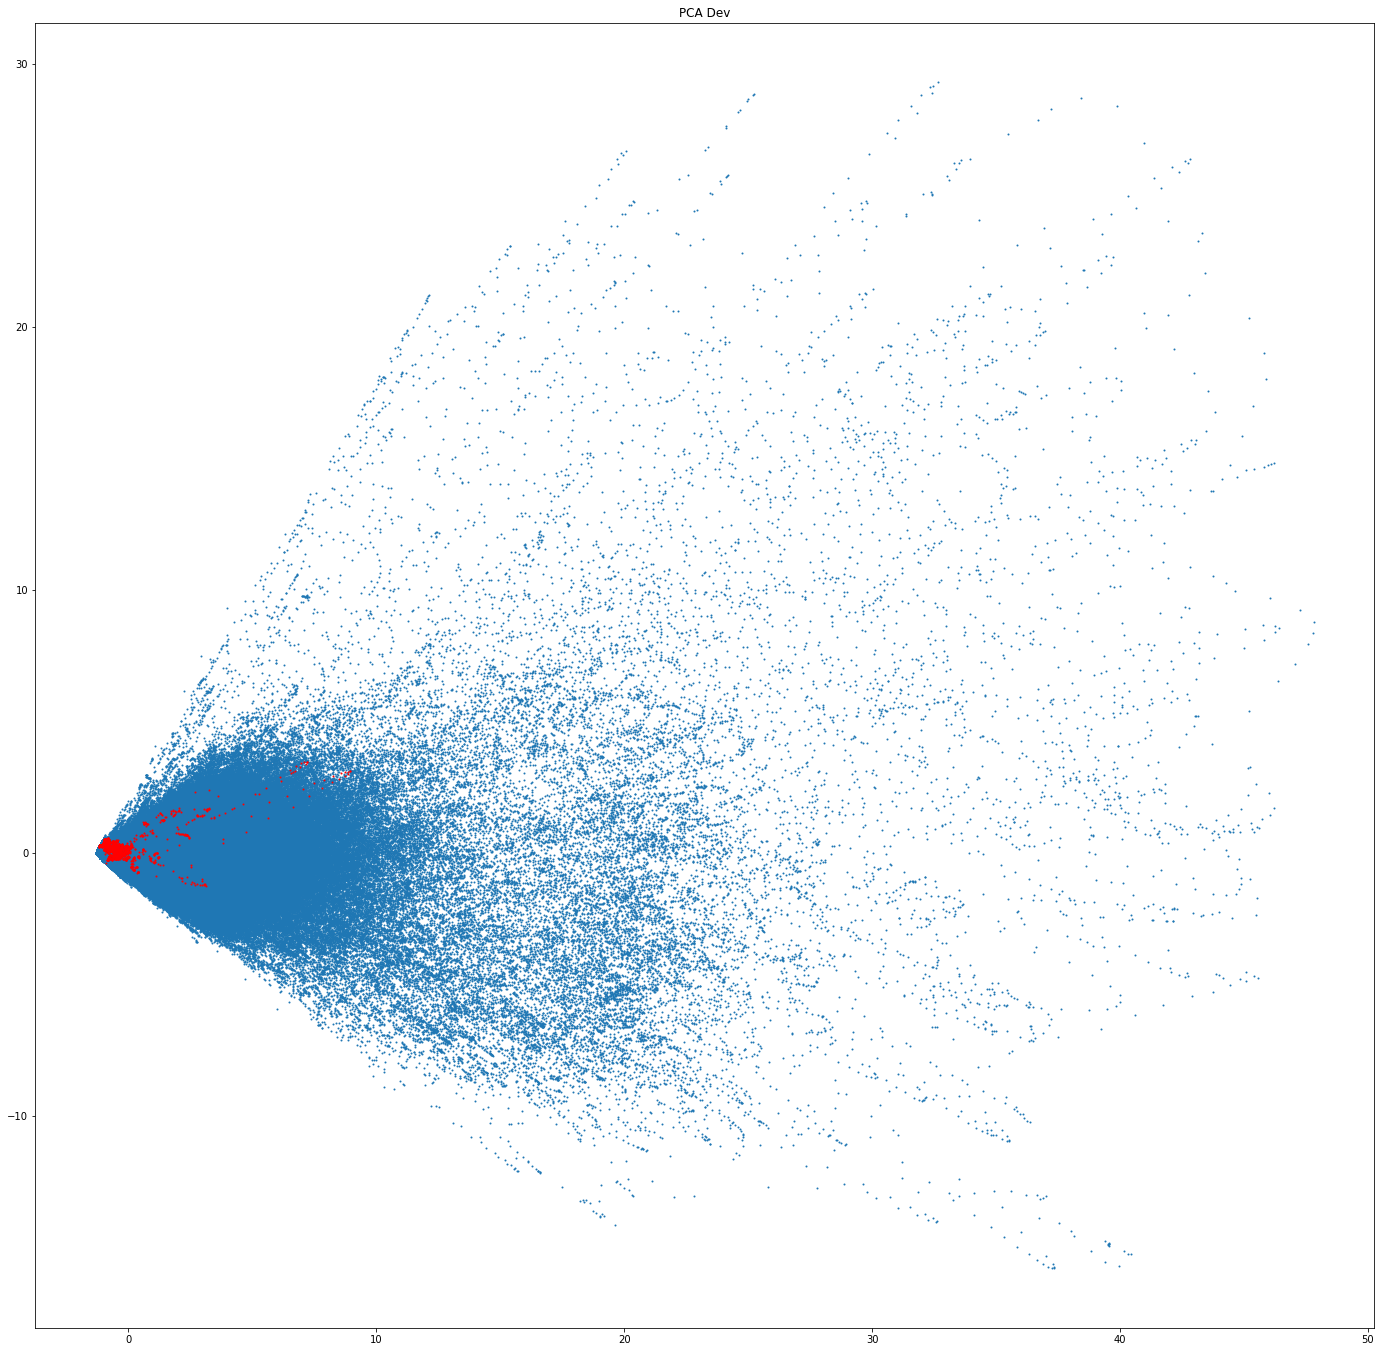

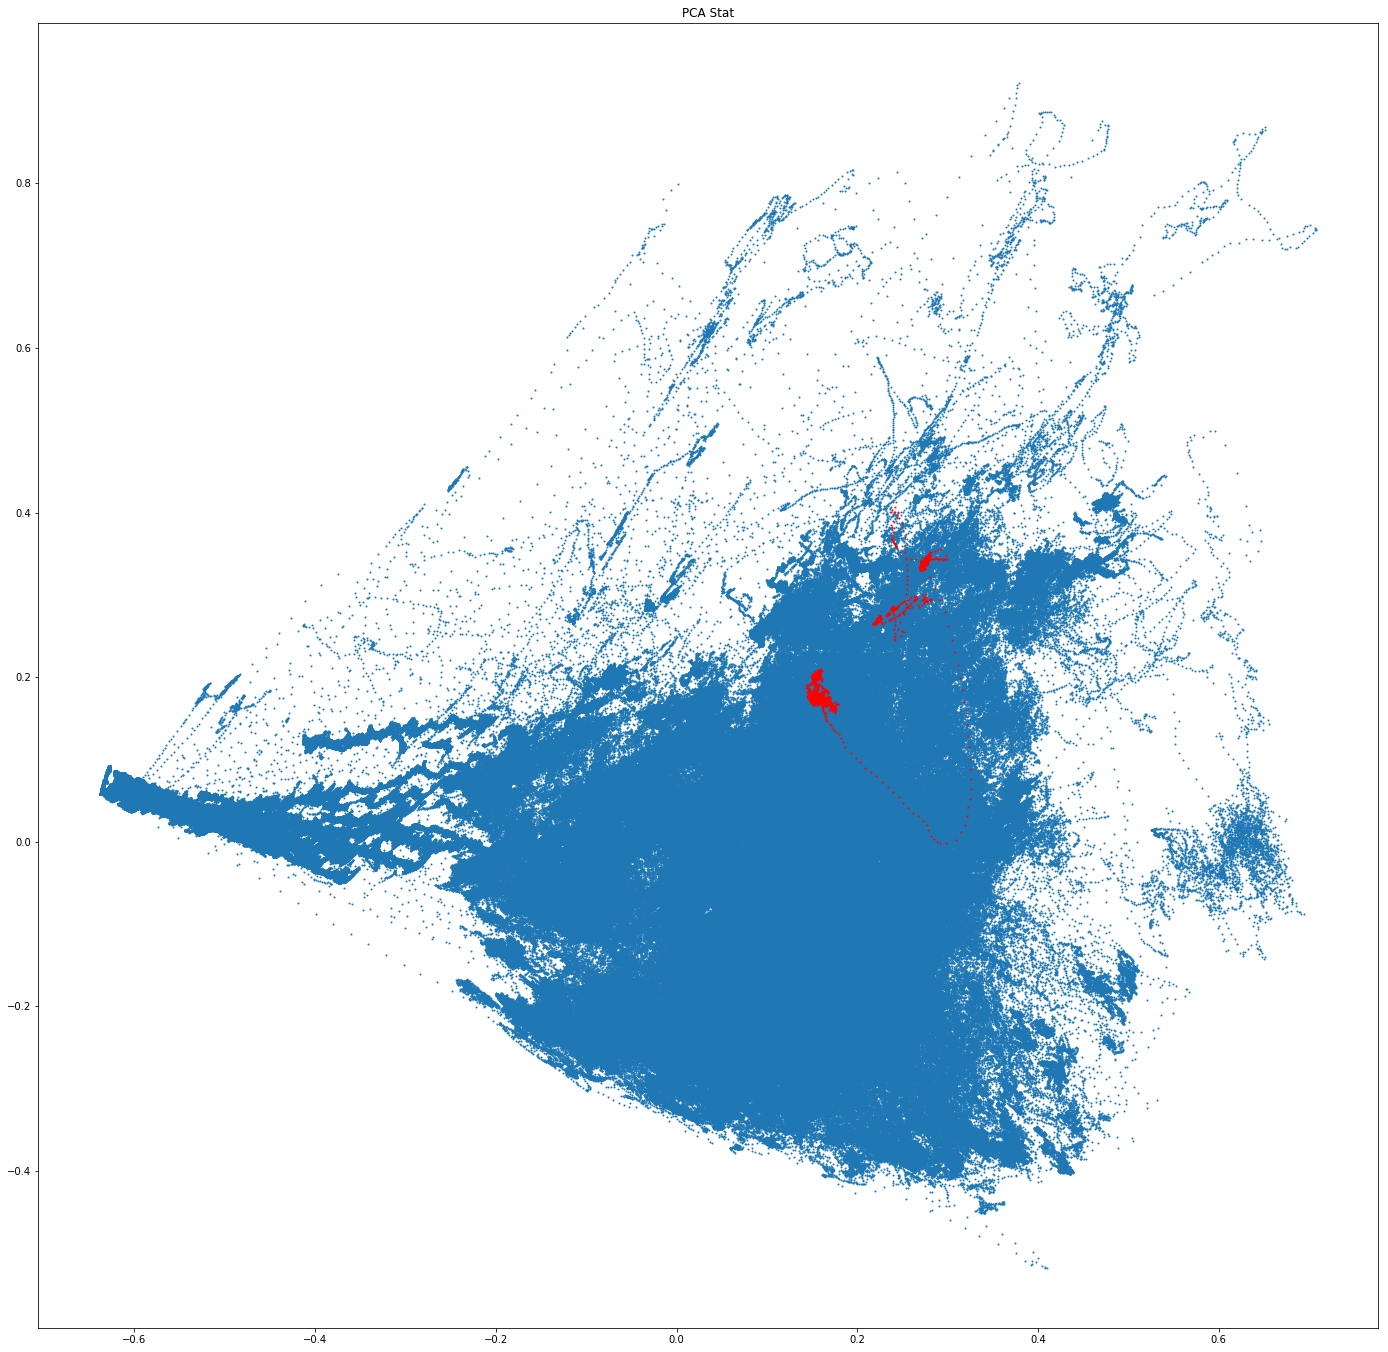

In [15]:
target = datosE.dropna()['target'].values
notTarget = np.logical_not(target)

sct = [pcaM,pcaD,pcaMD]
tit = ['Mean','Dev','Stat']
for i in range(len(sct)):
    pcaSample = sct[i]#sct[i][np.random.choice(sct[i].shape[0], int(4e4), replace=False), :]
    serie = pd.DataFrame(pcaSample)

    X = pd.Series(serie[0]).loc[notTarget]
    Y = pd.Series(serie[1]).loc[notTarget]

    X_t = pd.Series(serie[0]).loc[target]
    Y_t = pd.Series(serie[1]).loc[target]
    
    plt.figure(figsize=(24,24))
    
    plt.scatter(X,Y,s=1)
    plt.scatter(X_t,Y_t,s=1,c='r')
    plt.title('PCA '+tit[i])

## Tridimencional

In [14]:
data = datos.iloc[:,1:13]
pcaB = PCA(n_components=3).fit_transform(data)

In [ ]:
fig = plt.figure(figsize=(24,24))
ax = fig.add_subplot(111, projection='3d')

pcaSample = pcaB#pcaB[np.random.choice(pcaB.shape[0], int(4e4), replace=False), :]

target = datos['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(pcaSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]
Z = pd.Series(serie[2]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]
Z_t = pd.Series(serie[2]).loc[target]

ax.scatter(X,Y,Z,s=1)
ax.scatter(X_t,Y_t,Z_t,s=1,c='r')
plt.title('PCA Raw')


## Particionado - Solo día de ataques

In [5]:
### Días donde hubo crisis
dayOfSeizures = set()

for i in datos_seizure['DateTime']:
    dayOfSeizures.add(i.date())


#Todos los datos de esos días
crit = datos['DateTime'].map(lambda x: x.date() in dayOfSeizures)

datosPart = datos[crit]
datosPart.head()
len(datosPart)

118138

## SpectralEmbedding

In [3]:
from sklearn.manifold import SpectralEmbedding as SE

### Datos brutos

In [6]:
data = datosPart.iloc[:,1:13]

In [7]:
seB = SE(n_components=2,n_neighbors=50).fit_transform(data)

In [ ]:
plt.figure(figsize=(24,24))
seSample = seB

target = datosPart['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(seSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('Spectral Embedding Raw - Days of seizures')


Text(0.5, 1.0, 'Spectral Embedding Raw - Days of seizures')